# Polynomial Regression

In polynomial regression the relationship between the independent variable, $x$, and the dependent (target) variable, $y$, is modelled as a $p$-th degree polynomial in $x$.

Consider the following polynomial regression model
$$
    y_i = \theta_0 + \theta_1 x_j + \theta_2 x_j^2 + \dots + \theta_{p-1} x_j^{p-1} + \eta,  
$$
where $y_i$ is the $i$-th element of the target vector, $x_j$ is the $j$-th feature, $p$ is the number of parameters to be estimated and $\eta$ is the unmodeled error.

The predictor for the target variable is modeled as
$$
    \hat y_i = \theta_0 + \theta_1 x_j + \theta_2 x_j^2 + \dots + \theta_{p-1} x_j^{p-1}.  
$$

The objective is to find the parameter vector that minimizes the prediction error, as follows
$$
    \hat\theta = \arg\min_{\theta} \lVert \hat y - y \rVert_2 =  \lVert X\theta - y \rVert_2,
$$
where
$$
    y =
    \begin{bmatrix}
        y_1 \\
        y_2 \\
        \vdots \\
        y_N
    \end{bmatrix},
$$
$$
    X =
    \begin{bmatrix}
        1 & x_1 & x_1^2 & \dots & x_1^{p-1} \\
        1 & x_2 & x_2^2 & \dots & x_2^{p-1} \\
        \vdots & \vdots & \vdots & \ddots & \vdots \\
        1 & x_N & x_N^2 & \dots & x_N^{p-1}
    \end{bmatrix}
$$
and
$$
    \theta = 
    \begin{bmatrix}
        \theta_0 \\
        \theta_1 \\
        \vdots \\
        \theta_{p-1}
    \end{bmatrix}
$$

The estimated parameter vector is given by
$$
    \hat\theta = \left( X^T X \right)^{-1} X^T y = X^\dagger y,
$$
where $X^\dagger$ is the Moore-Penrose pseudo-inverse matrix of $X$.

In order to exemplify the application of this algorithm, a simple example is shown in the following code.
In this example, the parameter vector is estimated using the linear regression module (which computes the solution using singular value decomposition).

Parameters:
[0.5, 0.9, 0.8, 1.2]
Parameters estimated:
[0.5119, 0.9093, 0.7093, 1.1866]


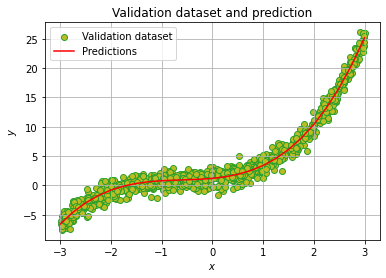

In [47]:
%matplotlib inline
import sys
from pathlib import Path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from random import gauss
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from main.supervised_learning.polynomial_regression import polynomial_regression

# Generates the data
# number of samples
N = 1000
# sets the seed
np.random.seed(1234)
# input
x = 6*np.random.rand(N, 1) - 3
# noise
noise = [gauss(0.0, 1.0) for i in range(N)]
noise = np.array(noise)
noise = noise.reshape((N,1))
# desired parameters
desired_parameters = [0.5, .9, .8, 1.2]
# polynomial's degree
degree = len(desired_parameters) - 1
# noiseless output
y_0 = np.zeros(N)
y_0 = y_0.reshape((N,1))
for index, item in enumerate(desired_parameters):
    y_0 = y_0 + \
        desired_parameters[index]*x**(degree-index)
# output affected by noise
y = y_0 + noise

# estimating the parameters
pol_reg = polynomial_regression.PolynomialRegression()
parameters_estimated = pol_reg.polynomial_regression(x, y, degree)

# input used to generate the predicted output
x_ = np.arange(-3,3.25,0.25)
# predicted output
y_pred = [0]*len(x_)
for index, item in enumerate(desired_parameters):
    y_pred = y_pred + \
        desired_parameters[index]*x_**(degree-index)

# gaussian noise with zero-mean and variance equals one
noise = [gauss(0.0, 1.0) for i in range(N)]
noise = np.array(noise)
noise = noise.reshape((N,1))
# validation output
y2 = y_0 + noise

print(f"Parameters:\n{desired_parameters}")
print(f"Parameters estimated:\n{np.array(parameters_estimated).round(4).tolist()}")

# data visualization
plt.scatter(x, y2, marker='o',
    edgecolors=mcolors.TABLEAU_COLORS.get('tab:green'),
    c=mcolors.TABLEAU_COLORS.get('tab:olive'), label='Validation dataset')
plt.plot(x_, y_pred, '-r', label='Predictions')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.title('Validation dataset and prediction')
plt.legend(loc='upper left')
plt.show()